In [1]:
# Install required libraries (run in terminal)
# pip install pandas numpy matplotlib seaborn plotly scikit-learn statsmodels jupyter

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv(r"C:\Users\Acer\Desktop\WHR\WHR2024.csv")

# Display first 5 rows
print(df.head())


  Country name  Ladder score  upperwhisker  lowerwhisker  \
0      Finland         7.741         7.815         7.667   
1      Denmark         7.583         7.665         7.500   
2      Iceland         7.525         7.618         7.433   
3       Sweden         7.344         7.422         7.267   
4       Israel         7.341         7.405         7.277   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.844                         1.572   
1                             1.908                         1.520   
2                             1.881                         1.617   
3                             1.878                         1.501   
4                             1.803                         1.513   

   Explained by: Healthy life expectancy  \
0                                  0.695   
1                                  0.699   
2                                  0.718   
3                                  0.724   
4   

In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing happiness scores
df_clean = df.dropna(subset=["Ladder score"])

# Fill other missing values with median (example for GDP)
df_clean["Explained by: Log GDP per capita"] = df_clean["Explained by: Log GDP per capita"].fillna(
    df_clean["Explained by: Log GDP per capita"].median()
)

# Add continents (manual mapping for key countries)
continent_mapping = {
    "Finland": "Europe", "Denmark": "Europe", "United States": "North America", 
    "India": "Asia", "South Africa": "Africa"
}
df_clean["Continent"] = df_clean["Country name"].map(continent_mapping)

# Save cleaned data
df_clean.to_csv("WHR_cleaned.csv", index=False)

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64


       Ladder score  upperwhisker  lowerwhisker  \
count    143.000000    143.000000    143.000000   
mean       5.527580      5.641175      5.413972   
std        1.170717      1.155008      1.187133   
min        1.721000      1.775000      1.667000   
25%        4.726000      4.845500      4.606000   
50%        5.785000      5.895000      5.674000   
75%        6.416000      6.507500      6.319000   
max        7.741000      7.815000      7.667000   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        143.000000                    140.000000   
mean                           1.379913                      1.134329   
std                            0.420652                      0.333317   
min                            0.000000                      0.000000   
25%                            1.079000                      0.921750   
50%                            1.431500                      1.237500   
75%                          

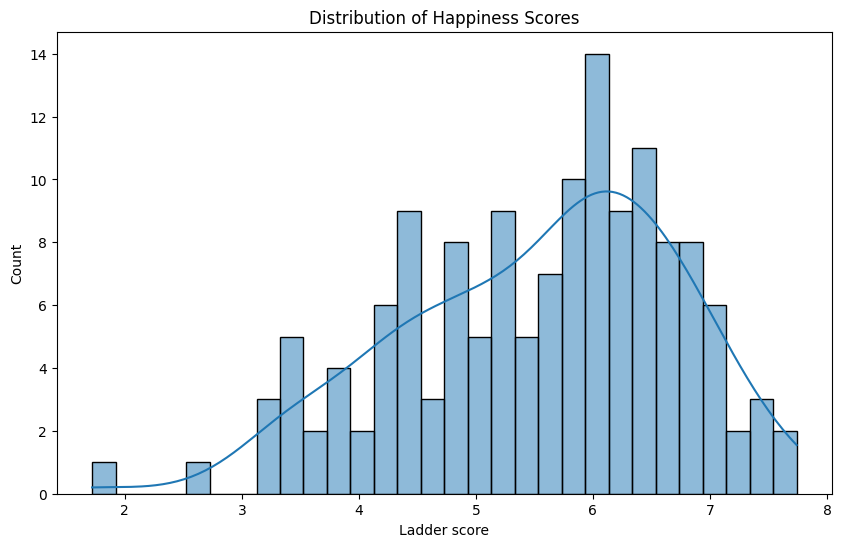

In [3]:
# Summary stats
print(df_clean.describe())

# Happiness score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["Ladder score"], bins=30, kde=True)
plt.title("Distribution of Happiness Scores")
plt.show()

In [4]:
# Top 10 happiest countries
top_10 = df_clean.sort_values("Ladder score", ascending=False).head(10)
print(top_10[["Country name", "Ladder score"]])

# Bottom 10 countries
bottom_10 = df_clean.sort_values("Ladder score").head(10)
print(bottom_10[["Country name", "Ladder score"]])

  Country name  Ladder score
0      Finland         7.741
1      Denmark         7.583
2      Iceland         7.525
3       Sweden         7.344
4       Israel         7.341
5  Netherlands         7.319
6       Norway         7.302
7   Luxembourg         7.122
8  Switzerland         7.060
9    Australia         7.057
         Country name  Ladder score
142       Afghanistan         1.721
141           Lebanon         2.707
140           Lesotho         3.186
139      Sierra Leone         3.245
138  Congo (Kinshasa)         3.295
137          Zimbabwe         3.341
136          Botswana         3.383
135            Malawi         3.421
134          Eswatini         3.502
133            Zambia         3.502


C:\Users\Acer\AppData\Local\Temp\ipykernel_10860\751081456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ladder score", y="Country name", data=top_10, palette="viridis")


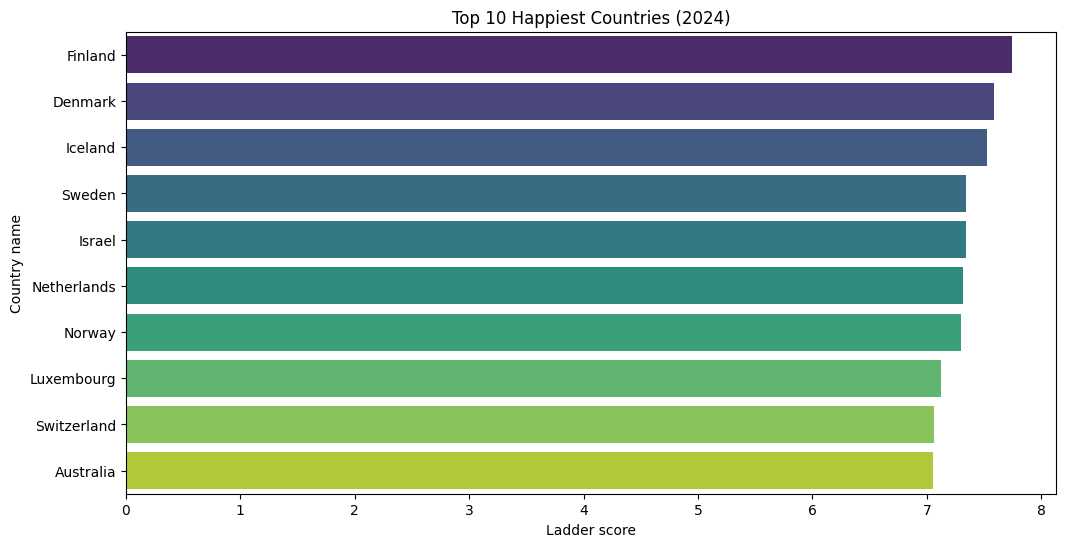

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Ladder score", y="Country name", data=top_10, palette="viridis")
plt.title("Top 10 Happiest Countries (2024)")
plt.show()

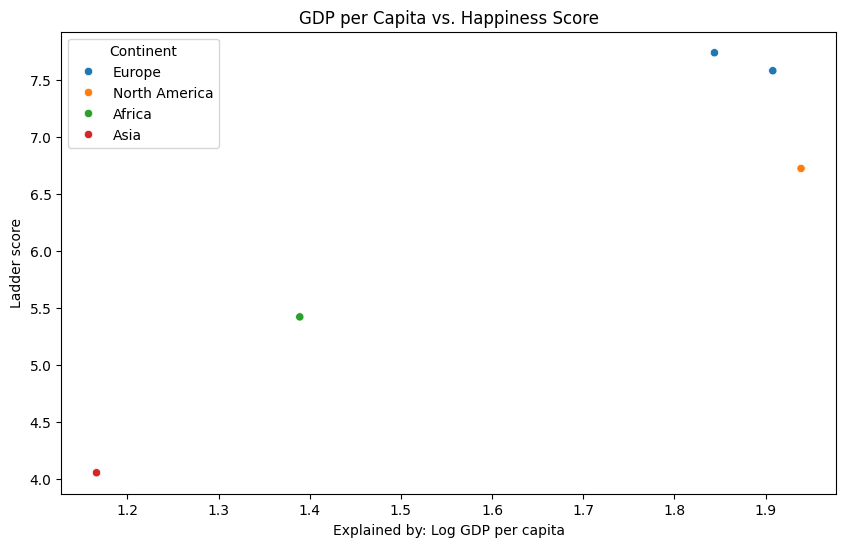

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Explained by: Log GDP per capita", 
    y="Ladder score", 
    data=df_clean,
    hue="Continent"  # Color by continent
)
plt.title("GDP per Capita vs. Happiness Score")
plt.show()

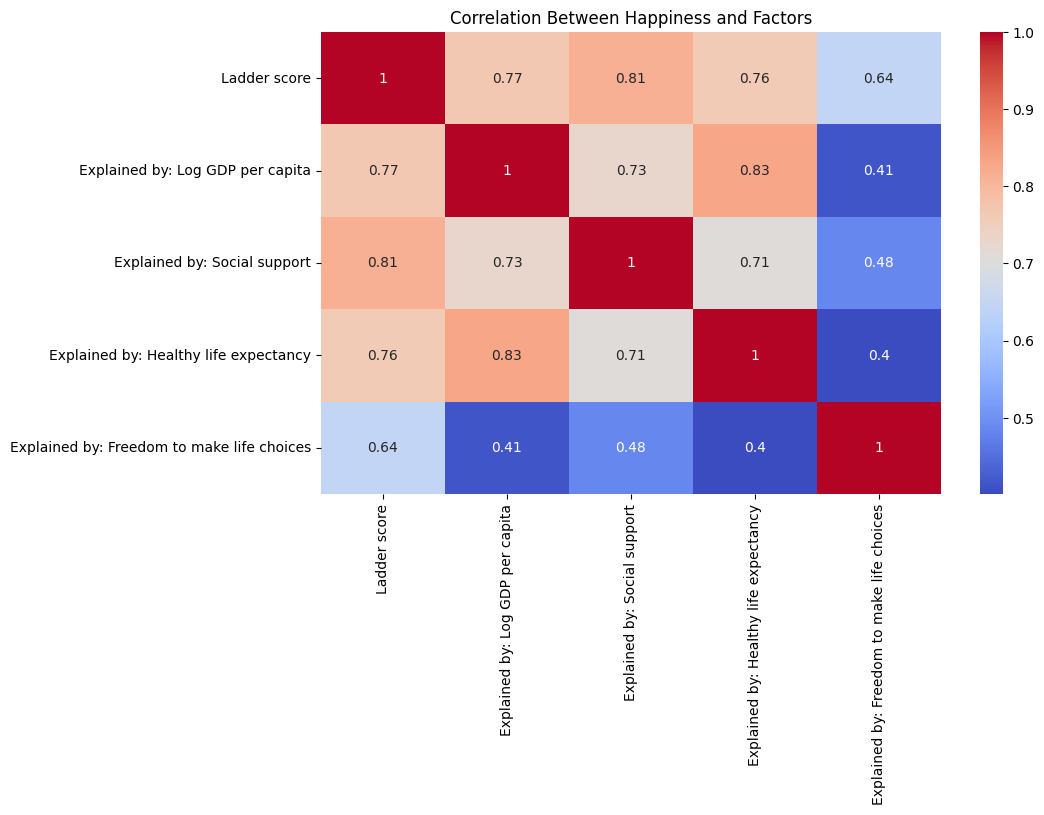

In [7]:
# Select key factors
factors = [
    "Ladder score",
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices"
]

plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[factors].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Happiness and Factors")
plt.show()

In [9]:
# Drop rows with missing values in X
X = df_clean[["Explained by: Log GDP per capita", "Explained by: Social support"]].dropna()
y = df_clean.loc[X.index, "Ladder score"]  # Keep only corresponding y values

# Fit model
model = LinearRegression()
model.fit(X, y)


# Fit model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("GDP impact on happiness:", round(model.coef_[0], 2))
print("Social support impact:", round(model.coef_[1], 2))

GDP impact on happiness: 1.04
Social support impact: 1.92


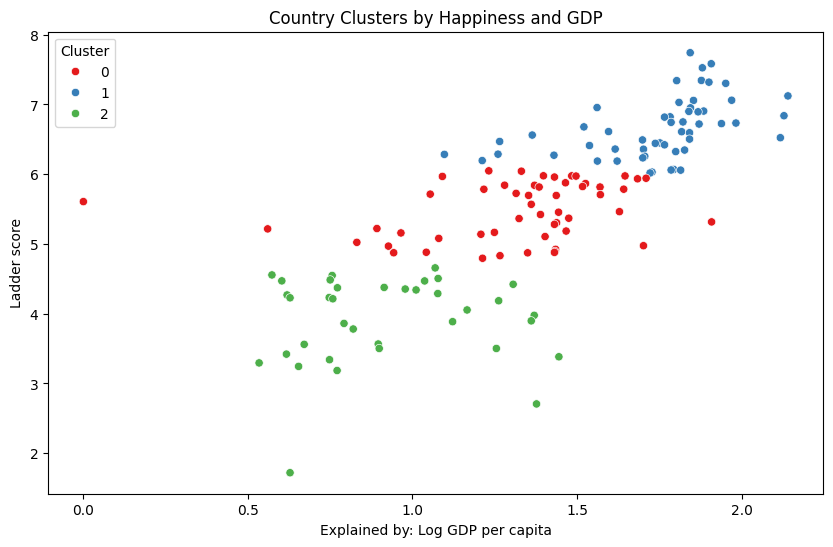

In [10]:
# Select features for clustering
X = df_clean[["Ladder score", "Explained by: Log GDP per capita"]]

# Cluster into 3 groups
kmeans = KMeans(n_clusters=3)
df_clean["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Explained by: Log GDP per capita", 
    y="Ladder score", 
    hue="Cluster", 
    data=df_clean, 
    palette="Set1"
)
plt.title("Country Clusters by Happiness and GDP")
plt.show()

In [11]:
# Interactive scatter plot
fig = px.scatter(
    df_clean, 
    x="Explained by: Log GDP per capita", 
    y="Ladder score",
    color="Continent",
    hover_data=["Country name"],
    title="Happiness vs. GDP (2024)"
)
fig.show()

# Save as HTML
fig.write_html("happiness_gdp_interactive.html")

In [14]:
# Just print the top 10 countries
print(top_10[["Country name", "Ladder score"]])

# Simple regression (no exports)
model = LinearRegression()
model.fit(X, y)
print("\nKey Drivers of Happiness:")
print(f"- GDP per capita impact: {model.coef_[0]:.2f}")
print(f"- Social support impact: {model.coef_[1]:.2f}")

  Country name  Ladder score
0      Finland         7.741
1      Denmark         7.583
2      Iceland         7.525
3       Sweden         7.344
4       Israel         7.341
5  Netherlands         7.319
6       Norway         7.302
7   Luxembourg         7.122
8  Switzerland         7.060
9    Australia         7.057

Key Drivers of Happiness:
- GDP per capita impact: 1.04
- Social support impact: 1.92
